### Basic Information on Data used in this Notebook
- Dataset is downloaded from Kaggle, it is available at this link -> https://www.kaggle.com/datasets/ihormuliar/starbucks-customer-data
- There are 3 datasets available: <br>
1) <u>**portfolio.json:**</u> *This contains information about different types of promotional offers being sent by Starbucks to its customers. Dataset contains Offer ID, Duration of The offer, Channels used for promotion (web, email, mobile, social), Reward associated with the offer, Offer Type (BOGO, discount, informational) & Difficulty (minimum amount to be spent to avail the offer).* <br>
2) <u>**profile.json:**</u> *Information about customers is stored in this table. Conatins column like Customer's Age, Income, Gender, Customer ID & Date on which customer created an account on Starbuck's app.* <br>
3) <u>**transcript.json:**</u> *Contains information on different promotional offers received by customers. Each promotion contains multiple steps, Offer Received, Offer Viwed & Transaction, this information is stored in Event column. There is also information on ID of the customer associated with the event, Offer ID or Transaction Amount (same column) & Time*

### Importing Required Libraries

In [45]:
import pandas as pd
import numpy as np

### Loading Data
As a first step, I would be loading the three files into 3 pandas dataframes. The original files are in **Jason** format, each line is present as a jason object. If we just use **pd.read_json("portfolio.json")**, we get **ValueError: Trailing data**. To solve for this, we need to pass **lines=True** argument to the **read_jason** function, this makes **read_jason** read each line from the files as a jason object.

In [21]:
df_portfolio = pd.read_json("portfolio.json", lines=True)
df_profile = pd.read_json("profile.json", lines=True)
df_transcript = pd.read_json("transcript.json", lines=True)

### Inspecting DataChecking 
Viewing size & first 5 rows of each dataframe. We can observe that first dataframe contains only 10 rows & 6 columns. Second dataframe contains 17k rows & 5 columns. Third dataframe contains 306534 rows & 4 columns.


In [28]:
print("Shape:",df_portfolio.shape)
print(df_portfolio.head())

Shape: (10, 6)
   reward                      channels  difficulty  duration     offer_type  \
0      10       [email, mobile, social]          10         7           bogo   
1      10  [web, email, mobile, social]          10         5           bogo   
2       0          [web, email, mobile]           0         4  informational   
3       5          [web, email, mobile]           5         7           bogo   
4       5                  [web, email]          20        10       discount   

                                 id  
0  ae264e3637204a6fb9bb56bc8210ddfd  
1  4d5c57ea9a6940dd891ad53e9dbe8da0  
2  3f207df678b143eea3cee63160fa8bed  
3  9b98b8c7a33c4b65b9aebfe6a799e6d9  
4  0b1e1539f2cc45b7b9fa7c272da2e1d7  


In [29]:
print("Shape:",df_profile.shape)
print(df_profile.head())

Shape: (17000, 5)
  gender  age                                id  became_member_on    income
0   None  118  68be06ca386d4c31939f3a4f0e3dd783          20170212       NaN
1      F   55  0610b486422d4921ae7d2bf64640c50b          20170715  112000.0
2   None  118  38fe809add3b4fcf9315a9694bb96ff5          20180712       NaN
3      F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509  100000.0
4   None  118  a03223e636434f42ac4c3df47e8bac43          20170804       NaN


In [30]:
print("Shape:",df_transcript.shape)
print(df_transcript.head())

Shape: (306534, 4)
                             person           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1  a03223e636434f42ac4c3df47e8bac43  offer received   
2  e2127556f4f64592b11af22de27a7932  offer received   
3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4  68617ca6246f4fbc85e91a2a49552598  offer received   

                                              value  time  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0  
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0  
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0  
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0  
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0  


In [76]:
#print("reward:",list(df_portfolio.reward.unique()))
#print("channels:",list(np.unique(np.array(df_portfolio.channels)))) # needed separate handling as it involved lists
#print("difficulty:",list(df_portfolio.difficulty.unique()))
#print("offer_type:",list(df_portfolio.offer_type.unique()))
#print("duration:",list(df_portfolio.duration.unique()))

<AxesSubplot:>

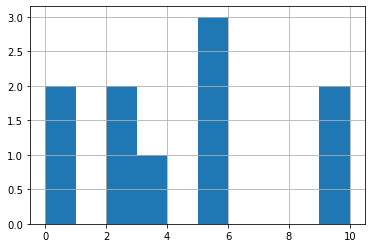

In [60]:
df_portfolio.reward.hist()

<AxesSubplot:>

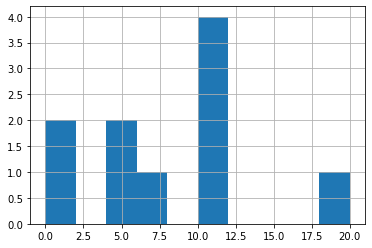

In [74]:
df_portfolio.difficulty.hist()

<AxesSubplot:>

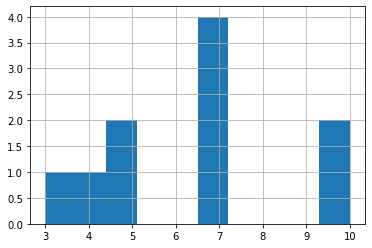

In [75]:
df_portfolio.duration.hist()

<AxesSubplot:xlabel='offer_type'>

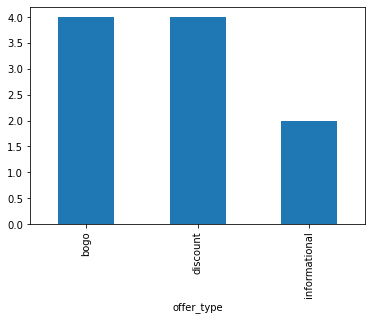

In [73]:
df_portfolio.groupby(by="offer_type").count()["id"].plot.bar()#.count()#.bar()

In [ ]:
### Barplot yet to be drawn for Channels

#df_channels_list = [tuple(x[0]) for x in df_portfolio[["channels"]].values]
#df_channels = pd.DataFrame()
#df_channels["channels"] = df_channels_list
#df_channels.head()
#df_channels.groupby(by="channels").count()

In [ ]:
### Draw hist & bar plots for other dataframes, if required

In [ ]:
df.set_index('key').join(other.set_index('key'))

In [127]:
df_transcript_profile = df_transcript.merge(df_profile, how="left", left_on="person", right_on="id", suffixes=('_transcript', '_profile'))
#.merge(df_portfolio, how="left", left_on=, right_on=, suffixes=("", '_portfolio'))

df_transcript_profile.head()

,person,event,value,time,gender,age,id,became_member_on,income
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,None,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN


In [ ]:
DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)[source]

In [132]:
df_transcript_profile["transcript_offer_id"] = [x['offer id'] for x in df_transcript_profile["value"].values]

KeyError: 'offer id'

In [142]:
[print(x['offer id']) for x in df_transcript_profile["value"].values]

9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2906b810c7d4411798c6938adc9daaa5
fafdcd668e3743c1bb461111dcafc2a4
4d5c57ea9a6940dd891ad53e9dbe8da0
f19421c1d4aa40978ebb69ca19b0e20d
2298d6c36e964ae4a3e7e9706d1fb8c2
3f207df678b143eea3cee63160fa8bed
0b1e1539f2cc45b7b9fa7c272da2e1d7
0b1e1539f2cc45b7b9fa7c272da2e1d7
0b1e1539f2cc45b7b9fa7c272da2e1d7
0b1e1539f2cc45b7b9fa7c272da2e1d7
ae264e3637204a6fb9bb56bc8210ddfd
3f207df678b143eea3cee63160fa8bed
0b1e1539f2cc45b7b9fa7c272da2e1d7
fafdcd668e3743c1bb461111dcafc2a4
0b1e1539f2cc45b7b9fa7c272da2e1d7
2906b810c7d4411798c6938adc9daaa5
9b98b8c7a33c4b65b9aebfe6a799e6d9
ae264e3637204a6fb9bb56bc8210ddfd
2906b810c7d4411798c6938adc9daaa5
9b98b8c7a33c4b65b9aebfe6a799e6d9
4d5c57ea9a6940dd891ad53e9dbe8da0
2906b810c7d4411798c6938adc9daaa5
2298d6c36e964ae4a3e7e9706d1fb8c2
2906b810c7d4411798c6938adc9daaa5
f19421c1d4aa40978ebb69ca19b0e20d
ae264e3637204a6fb9bb56bc8210ddfd
9b98b8c7a33c4b65b9aebfe6a799e6d9
fafdcd668e3743c1bb461111dcafc2a4
9b98b8c7a3

f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
2298d6c36e964ae4a3e7e9706d1fb8c2
3f207df678b143eea3cee63160fa8bed
3f207df678b143eea3cee63160fa8bed
2298d6c36e964ae4a3e7e9706d1fb8c2
f19421c1d4aa40978ebb69ca19b0e20d
4d5c57ea9a6940dd891ad53e9dbe8da0
5a8bc65990b245e5a138643cd4eb9837
f19421c1d4aa40978ebb69ca19b0e20d
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
2298d6c36e964ae4a3e7e9706d1fb8c2
0b1e1539f2cc45b7b9fa7c272da2e1d7
0b1e1539f2cc45b7b9fa7c272da2e1d7
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
4d5c57ea9a6940dd891ad53e9dbe8da0
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
3f207df678b143eea3cee63160fa8bed
fafdcd668e3743c1bb461111dcafc2a4
3f207df678b143eea3cee63160fa8bed
2298d6c36e964ae4a3e7e9706d1fb8c2
ae264e3637204a6fb9bb56bc8210ddfd
ae264e3637204a6fb9bb56bc8210ddfd
2906b810c7d4411798c6938adc9daaa5
5a8bc65990b245e5a138643cd4eb9837
2298d6c36e964ae4a3e7e9706d1fb8c2
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7

5a8bc65990b245e5a138643cd4eb9837
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
2298d6c36e964ae4a3e7e9706d1fb8c2
9b98b8c7a33c4b65b9aebfe6a799e6d9
f19421c1d4aa40978ebb69ca19b0e20d
ae264e3637204a6fb9bb56bc8210ddfd
f19421c1d4aa40978ebb69ca19b0e20d
5a8bc65990b245e5a138643cd4eb9837
ae264e3637204a6fb9bb56bc8210ddfd
9b98b8c7a33c4b65b9aebfe6a799e6d9
2298d6c36e964ae4a3e7e9706d1fb8c2
5a8bc65990b245e5a138643cd4eb9837
9b98b8c7a33c4b65b9aebfe6a799e6d9
f19421c1d4aa40978ebb69ca19b0e20d
2298d6c36e964ae4a3e7e9706d1fb8c2
9b98b8c7a33c4b65b9aebfe6a799e6d9
2906b810c7d4411798c6938adc9daaa5
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
4d5c57ea9a6940dd891ad53e9dbe8da0
0b1e1539f2cc45b7b9fa7c272da2e1d7
fafdcd668e3743c1bb461111dcafc2a4
4d5c57ea9a6940dd891ad53e9dbe8da0
9b98b8c7a33c4b65b9aebfe6a799e6d9
9b98b8c7a33c4b65b9aebfe6a799e6d9
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
ae264e3637

KeyError: 'offer id'

In [143]:
df_transcript.groupby(by="event").count()

,person,value,time
event,,,
offer completed,33579,33579,33579
offer received,76277,76277,76277
offer viewed,57725,57725,57725
transaction,138953,138953,138953


In [144]:
df_transcript_profile[df_transcript_profile["event"]!="transaction"]

,person,event,value,time,gender,age,id,became_member_on,income
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,None,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
...,...,...,...,...,...,...,...,...,...
306497,a6f84f4e976f44508c358cc9aba6d2b3,offer completed,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,714,None,118,a6f84f4e976f44508c358cc9aba6d2b3,20170116,NaN
306506,b895c57e8cd047a8872ce02aa54759d6,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714,None,118,b895c57e8cd047a8872ce02aa54759d6,20170125,NaN
306507,8dda575c2a1d44b9ac8e8b07b93d1f8e,offer viewed,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},714,F,60,8dda575c2a1d44b9ac8e8b07b93d1f8e,20170908,64000.0
306509,8431c16f8e1d440880db371a68f82dd0,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714,M,39,8431c16f8e1d440880db371a68f82dd0,20180627,39000.0


In [148]:
[print(x['offer id']) for x in df_transcript_profile[df_transcript_profile["event"]!="transaction"]["value"].values]

9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2906b810c7d4411798c6938adc9daaa5
fafdcd668e3743c1bb461111dcafc2a4
4d5c57ea9a6940dd891ad53e9dbe8da0
f19421c1d4aa40978ebb69ca19b0e20d
2298d6c36e964ae4a3e7e9706d1fb8c2
3f207df678b143eea3cee63160fa8bed
0b1e1539f2cc45b7b9fa7c272da2e1d7
0b1e1539f2cc45b7b9fa7c272da2e1d7
0b1e1539f2cc45b7b9fa7c272da2e1d7
0b1e1539f2cc45b7b9fa7c272da2e1d7
ae264e3637204a6fb9bb56bc8210ddfd
3f207df678b143eea3cee63160fa8bed
0b1e1539f2cc45b7b9fa7c272da2e1d7
fafdcd668e3743c1bb461111dcafc2a4
0b1e1539f2cc45b7b9fa7c272da2e1d7
2906b810c7d4411798c6938adc9daaa5
9b98b8c7a33c4b65b9aebfe6a799e6d9
ae264e3637204a6fb9bb56bc8210ddfd
2906b810c7d4411798c6938adc9daaa5
9b98b8c7a33c4b65b9aebfe6a799e6d9
4d5c57ea9a6940dd891ad53e9dbe8da0
2906b810c7d4411798c6938adc9daaa5
2298d6c36e964ae4a3e7e9706d1fb8c2
2906b810c7d4411798c6938adc9daaa5
f19421c1d4aa40978ebb69ca19b0e20d
ae264e3637204a6fb9bb56bc8210ddfd
9b98b8c7a33c4b65b9aebfe6a799e6d9
fafdcd668e3743c1bb461111dcafc2a4
9b98b8c7a3

3f207df678b143eea3cee63160fa8bed
0b1e1539f2cc45b7b9fa7c272da2e1d7
5a8bc65990b245e5a138643cd4eb9837
9b98b8c7a33c4b65b9aebfe6a799e6d9
9b98b8c7a33c4b65b9aebfe6a799e6d9
9b98b8c7a33c4b65b9aebfe6a799e6d9
3f207df678b143eea3cee63160fa8bed
4d5c57ea9a6940dd891ad53e9dbe8da0
4d5c57ea9a6940dd891ad53e9dbe8da0
9b98b8c7a33c4b65b9aebfe6a799e6d9
ae264e3637204a6fb9bb56bc8210ddfd
9b98b8c7a33c4b65b9aebfe6a799e6d9
9b98b8c7a33c4b65b9aebfe6a799e6d9
fafdcd668e3743c1bb461111dcafc2a4
fafdcd668e3743c1bb461111dcafc2a4
4d5c57ea9a6940dd891ad53e9dbe8da0
0b1e1539f2cc45b7b9fa7c272da2e1d7
ae264e3637204a6fb9bb56bc8210ddfd
3f207df678b143eea3cee63160fa8bed
5a8bc65990b245e5a138643cd4eb9837
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
2298d6c36e964ae4a3e7e9706d1fb8c2
2906b810c7d4411798c6938adc9daaa5
fafdcd668e3743c1bb461111dcafc2a4
9b98b8c7a33c4b65b9aebfe6a799e6d9
fafdcd668e3743c1bb461111dcafc2a4
3f207df678b143eea3cee63160fa8bed
ae264e3637204a6fb9bb56bc8210ddfd
5a8bc65990b245e5a138643cd4eb9837
2298d6c36e

3f207df678b143eea3cee63160fa8bed
5a8bc65990b245e5a138643cd4eb9837
fafdcd668e3743c1bb461111dcafc2a4
3f207df678b143eea3cee63160fa8bed
f19421c1d4aa40978ebb69ca19b0e20d
2298d6c36e964ae4a3e7e9706d1fb8c2
5a8bc65990b245e5a138643cd4eb9837
4d5c57ea9a6940dd891ad53e9dbe8da0
2298d6c36e964ae4a3e7e9706d1fb8c2
f19421c1d4aa40978ebb69ca19b0e20d
5a8bc65990b245e5a138643cd4eb9837
ae264e3637204a6fb9bb56bc8210ddfd
2298d6c36e964ae4a3e7e9706d1fb8c2
2298d6c36e964ae4a3e7e9706d1fb8c2
0b1e1539f2cc45b7b9fa7c272da2e1d7
0b1e1539f2cc45b7b9fa7c272da2e1d7
3f207df678b143eea3cee63160fa8bed
fafdcd668e3743c1bb461111dcafc2a4
0b1e1539f2cc45b7b9fa7c272da2e1d7
fafdcd668e3743c1bb461111dcafc2a4
9b98b8c7a33c4b65b9aebfe6a799e6d9
f19421c1d4aa40978ebb69ca19b0e20d
4d5c57ea9a6940dd891ad53e9dbe8da0
0b1e1539f2cc45b7b9fa7c272da2e1d7
0b1e1539f2cc45b7b9fa7c272da2e1d7
ae264e3637204a6fb9bb56bc8210ddfd
3f207df678b143eea3cee63160fa8bed
3f207df678b143eea3cee63160fa8bed
0b1e1539f2cc45b7b9fa7c272da2e1d7
0b1e1539f2cc45b7b9fa7c272da2e1d7
9b98b8c7a3

KeyError: 'offer id'

In [146]:
df_transcript_profile[df_transcript_profile["event"]!="transaction"]["value"].values

array([{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},
       {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},
       {'offer id': '2906b810c7d4411798c6938adc9daaa5'}, ...,
       {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},
       {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4', 'reward': 2},
       {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4', 'reward': 2}],
      dtype=object)

In [150]:
df_transcript_profile[["event", "value"]]

,event,value
0,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
...,...,...
306529,transaction,{'amount': 1.5899999999999999}
306530,transaction,{'amount': 9.53}
306531,transaction,{'amount': 3.61}
306532,transaction,{'amount': 3.5300000000000002}


In [165]:
df_transcript_profile["transcript_offer_id"] = [x["offer id"] for x in df_transcript_profile[((df_transcript_profile["event"]=="offer received") |
                                         (df_transcript_profile["event"]=="offer viewed"))]["value"].values]

['9b98b8c7a33c4b65b9aebfe6a799e6d9',
 '0b1e1539f2cc45b7b9fa7c272da2e1d7',
 '2906b810c7d4411798c6938adc9daaa5',
 'fafdcd668e3743c1bb461111dcafc2a4',
 '4d5c57ea9a6940dd891ad53e9dbe8da0',
 'f19421c1d4aa40978ebb69ca19b0e20d',
 '2298d6c36e964ae4a3e7e9706d1fb8c2',
 '3f207df678b143eea3cee63160fa8bed',
 '0b1e1539f2cc45b7b9fa7c272da2e1d7',
 '0b1e1539f2cc45b7b9fa7c272da2e1d7',
 '0b1e1539f2cc45b7b9fa7c272da2e1d7',
 '0b1e1539f2cc45b7b9fa7c272da2e1d7',
 'ae264e3637204a6fb9bb56bc8210ddfd',
 '3f207df678b143eea3cee63160fa8bed',
 '0b1e1539f2cc45b7b9fa7c272da2e1d7',
 'fafdcd668e3743c1bb461111dcafc2a4',
 '0b1e1539f2cc45b7b9fa7c272da2e1d7',
 '2906b810c7d4411798c6938adc9daaa5',
 '9b98b8c7a33c4b65b9aebfe6a799e6d9',
 'ae264e3637204a6fb9bb56bc8210ddfd',
 '2906b810c7d4411798c6938adc9daaa5',
 '9b98b8c7a33c4b65b9aebfe6a799e6d9',
 '4d5c57ea9a6940dd891ad53e9dbe8da0',
 '2906b810c7d4411798c6938adc9daaa5',
 '2298d6c36e964ae4a3e7e9706d1fb8c2',
 '2906b810c7d4411798c6938adc9daaa5',
 'f19421c1d4aa40978ebb69ca19b0e20d',
 